Outliers

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data=pd.DataFrame({'Age':[11,12,13,14,15,16,17,18,19,20,50]})
data

,Age
0,11
1,12
2,13
3,14
4,15
5,16
6,17
7,18
8,19
9,20


<Axes: xlabel='Age', ylabel='Count'>

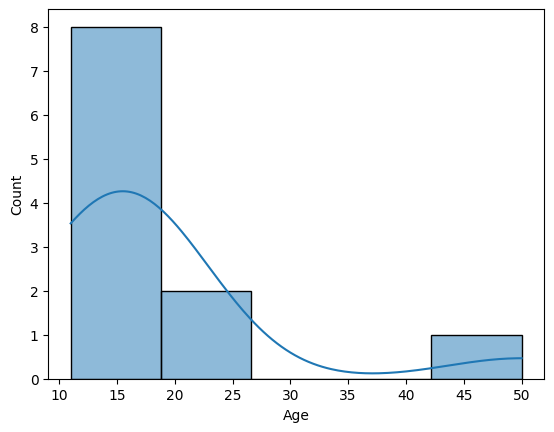

In [19]:
sns.histplot(data['Age'],bins=5,kde=True)

In [20]:
data['mean']=np.mean(data['Age'])
data['std']=np.std(data['Age'])

In [21]:
data['z_score']=(data['Age']-data['mean'])/data['std']

In [22]:
print('========================================')
print('Here is the data with outliers:\n',data)
print('========================================')

Here is the data with outliers:
     Age       mean        std   z_score
0    11  18.636364  10.289206 -0.742172
1    12  18.636364  10.289206 -0.644983
2    13  18.636364  10.289206 -0.547794
3    14  18.636364  10.289206 -0.450605
4    15  18.636364  10.289206 -0.353415
5    16  18.636364  10.289206 -0.256226
6    17  18.636364  10.289206 -0.159037
7    18  18.636364  10.289206 -0.061848
8    19  18.636364  10.289206  0.035342
9    20  18.636364  10.289206  0.132531
10   50  18.636364  10.289206  3.048208


In [23]:
df=data[data['z_score']>3]
print('Outliers based on threshold, 3:')
df

Outliers based on threshold, 3:


,Age,mean,std,z_score
10,50,18.636364,10.289206,3.048208


In [24]:
# Remove outliers
data=data[data['z_score']<=3]
print('Here data without Outliers:')
data

Here data without Outliers:


,Age,mean,std,z_score
0,11,18.636364,10.289206,-0.742172
1,12,18.636364,10.289206,-0.644983
2,13,18.636364,10.289206,-0.547794
3,14,18.636364,10.289206,-0.450605
4,15,18.636364,10.289206,-0.353415
5,16,18.636364,10.289206,-0.256226
6,17,18.636364,10.289206,-0.159037
7,18,18.636364,10.289206,-0.061848
8,19,18.636364,10.289206,0.035342
9,20,18.636364,10.289206,0.132531


In [25]:
import numpy as np
from scipy import stats

In [26]:
data=[12,13,14,15,16,17,18,19,20,70]
z_score=np.abs(stats.zscore(data))

threshold=2.5
outliers=np.where(z_score>threshold)[0]

In [27]:
print('Here the index outliers: ',outliers)
print('Here the outliers: ',[data[i] for i in outliers])
print('======================================')
print('Without outliers: \n',[data[i] for i in range(len(data)) if i not in outliers ])
print('======================================')

Here the index outliers:  [9]
Here the outliers:  [70]
Without outliers: 
 [12, 13, 14, 15, 16, 17, 18, 19, 20]


Use sklearn to remove outliers

In [28]:
from sklearn.cluster import KMeans
data=[[2,2],[3,3],[3,4],[30,30],[31,31],[32,32]]
data

[[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

In [29]:
kmeans=KMeans(n_clusters=2,n_init=10)
kmeans.fit(data)
labels=kmeans.predict(data)

In [30]:
outliers=[data[i] for i,label in enumerate(labels) if label==0]

In [31]:
print('Outliers: ',outliers)

Outliers:  [[30, 30], [31, 31], [32, 32]]


In [32]:
data=[data[i] for i,label in enumerate(labels) if label==1]
print('Data without outliers: ',data)

Data without outliers:  [[2, 2], [3, 3], [3, 4]]
